In [1]:
import numpy as np
import torch
from torch import optim


## Numpy

In [2]:
t = np.array([0.,1.,2.,3.,4.,5.,6.]) 
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 1
Shape of t: (7,)


In [4]:
print('t[0] t[1] t[-1] =' ,t[0], t[1], t[-1] )
print('t[2:5] t[4:-1] =' ,t[2:5] ,t[4:-1] )
print('t[:2] t[3:] =' ,t[:2] ,t[3:] )

t[0] t[1] t[-1] = 0.0 1.0 6.0
t[2:5] t[4:-1] = [2. 3. 4.] [4. 5.]
t[:2] t[3:] = [0. 1.] [3. 4. 5. 6.]


In [5]:
t = np.array([[.1,2.,3.], [ 4.,5.,6.] , [7.,8.,9.],[10.,11.,12]])
print(t)

[[ 0.1  2.   3. ]
 [ 4.   5.   6. ]
 [ 7.   8.   9. ]
 [10.  11.  12. ]]


In [6]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 2
Shape of t: (4, 3)


## Pytorch

In [7]:
t = torch.FloatTensor([0.,1.,2.,3.,4.,5.,6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [8]:
print(t.dim())
print(t.size())
print(t[0],t[1],t[-1])
print(t[2:5],t[4:-1])
print(t[:2],t[3:])

1
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


### 2D Array with PyTorch

In [9]:
t = torch.FloatTensor([[1.,2.,3.],
                     [4.,5.,6.],
                     [7.,8.,9.],
                     [10.,11.,12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [10]:
print(t.dim())
print(t.size())
print(t[:,1])
print(t[:,1].size())
print(t[:,:-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## Broadcasting

In [11]:
# same shape
m1 = torch.FloatTensor([3,3])
m2 = torch.FloatTensor([2,2])
print(m1+m2)

tensor([5., 5.])


In [12]:
#Vector +scalar
m1 = torch.FloatTensor([1,2])
m2 = torch.FloatTensor([3])
print(m1+m2)

tensor([4., 5.])


In [13]:
# 2x1 Vector + 1x2 Vector
m1 = torch.FloatTensor([1,2])
m2 = torch.FloatTensor([[3],[4]])
print(m1+m2)

tensor([[4., 5.],
        [5., 6.]])


## Multiplitcation vs Matrix Multiplication

In [14]:
print()
print('_______________')
print('Mul vs Matmul')
print('_______________')
m1 = torch.FloatTensor([[1,2],[3,4]])
m2 = torch.FloatTensor([[1],[2]])
print('Shape of Matirx 1:', m1.shape) # 2x2
print('Shape of Matirx 2:', m2.shape) # 2x1
print(m1.matmul(m2)) #2x1

m1 = torch.FloatTensor([[1,2],[3,4]])
m2 = torch.FloatTensor([[1],[2]])
print('Shape of Matirx 1:', m1.shape) # 2x2
print('Shape of Matirx 2:', m2.shape) # 2x1
print(m1*m2) #2x2
print(m1.mul(m2))




_______________
Mul vs Matmul
_______________
Shape of Matirx 1: torch.Size([2, 2])
Shape of Matirx 2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matirx 1: torch.Size([2, 2])
Shape of Matirx 2: torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


## Mean

In [15]:
t = torch.FloatTensor([1,2])
print(t.mean())

tensor(1.5000)


In [16]:
# Cant use mean() on integers
t = torch.LongTensor([1,2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

Can only calculate the mean of floating types. Got Long instead.


you can also use t.mean for higher rank tensors to get mean of all elements, or mean by particular dimesion

In [17]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [18]:
print(t.mean())
print(t.mean(dim = 0))
print(t.mean(dim = 1))
print(t.mean(dim = -1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


## Sum

In [19]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [20]:
print(t.sum)
print(t.sum(dim = 0))
print(t.sum(dim = 1))
print(t.sum(dim = -1))

<built-in method sum of Tensor object at 0x000001D954C3DB00>
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


## max, Argmax

In [21]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


the 'max' orperator returns one value if it is called without an argument

In [22]:
print(t.max())

tensor(4.)


The *max* operator returns 2 values when called with dimesion specified. The first value is the maximum value, and the second value is the *argmax*: the index of the element with maximum value

In [23]:
print(t.max(dim = 0))
print('Max:', t.max(dim = 0)[0])
print('Argmax:', t.max(dim = 0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max: tensor([3., 4.])
Argmax: tensor([1, 1])


In [24]:
print(t.max(dim= 1))
print(t.max(dim= -1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


## View (Reshape)

In [25]:
t = np.array([[[0,1,2],
              [3,4,5]],
             [[6,7,8],
             [9,10,11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [26]:
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [27]:
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## Squeeze

In [28]:
ft = torch.FloatTensor([[[0]], [[1]],[[2]]])
print(ft)
print(ft.shape)


tensor([[[0.]],

        [[1.]],

        [[2.]]])
torch.Size([3, 1, 1])


In [29]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [30]:
print(ft.squeeze(dim = 1))
print(ft.squeeze(dim = 1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Unsqueeze

In [31]:
ft = torch.Tensor([0,1,2])
print(ft.shape)

torch.Size([3])


In [32]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [33]:
print(ft.view(1,-1))
print(ft.view(1,-1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [34]:
print(ft.unsqueeze(dim =1))
print(ft.unsqueeze(dim =1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [35]:
print(ft.unsqueeze(dim =-1))
print(ft.unsqueeze(dim =-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Type Casting

In [36]:
lt = torch.LongTensor([1,2,3,4])
print(lt)

tensor([1, 2, 3, 4])


In [37]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [38]:
bt = torch.ByteTensor([True,False,False,True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [39]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate

In [40]:
x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6],[7,8]])

In [41]:
print(torch.cat([x,y],dim = 0))
print(torch.cat([x,y],dim = 1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [42]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

In [43]:
print(torch.stack([x,y,z]))
print(torch.stack([x,y,z],dim = 1))


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [44]:
print( torch.cat([x.unsqueeze(0),y.unsqueeze(0), z.unsqueeze(0)],dim = 0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## Ones and Zeros

In [45]:
x = torch.FloatTensor([[0,1,2],[2,1,0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [46]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-Place Operation

In [47]:
x = torch.FloatTensor([[1,2],[3,4]])

In [48]:
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# 2. Linear Regression

## Data definition

In [49]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

## Hypothesis

 ##### y = Wx+b 

In [50]:
# requires_grad 공부해야함
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)
hypothesis = x_train * W +b

## Loss
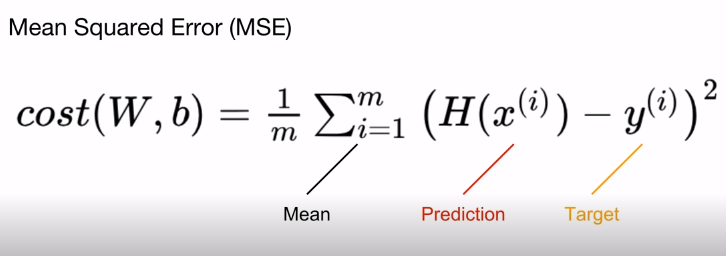

In [51]:
cost = torch.mean((hypothesis - y_train)**2)

In [52]:
optimizer = optim.SGD([W,b], lr = 0.01)

optimizer.zero_grad() # gradient 초기화
cost.backward() # gardient 계산
optimizer.step()

## Full training code

In [53]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# requires_grad 공부해야함
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr = 0.01)


nb_epochs = 10000
for epoch in range(1,nb_epochs + 1):
    
    hypothesis = x_train * W +b
    cost = torch.mean((hypothesis - y_train)**2)

    
    optimizer.zero_grad() # gradient 초기화
    cost.backward() # gardient 계산
    optimizer.step() 

In [54]:
print(W,b)

tensor([2.0000], requires_grad=True) tensor([8.7018e-06], requires_grad=True)


# 3. Deeper Look at GD

##### H(x) = Wx

In [55]:
W = torch.zeros(1, requires_grad = True)
hypothesis = x_train * W

In [56]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

## Cost Function
cost function은 모델의 예측 값이 실제 값과 얼마나 다른지 평가

In [57]:
cost = torch.mean((hypothesis - y_train)**2)

## Gradient Descent 경사하강법
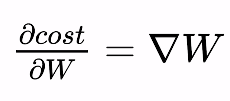

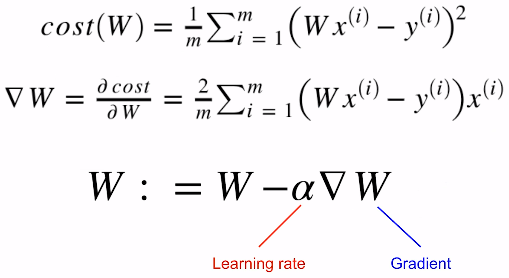

In [58]:
gradient = 2* torch.mean((W*x_train - y_train)*x_train)

### Full code

In [59]:
# data
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#모델 초기화
W = torch.zeros(1)
#Learning rate 설정
lr = 0.1

nb_epochs = 10

for epoch in range(nb_epochs +1):
    
    #H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train)**2)
    gradient = 2* torch.mean((W*x_train - y_train)*x_train)
    
    print('Epoch {:4d}/{} W: {:3f},Cost: {:6f}'.format(epoch,nb_epochs,W.item(),cost.item()))
    
    
    #cost gradient로 H(x) 개선
    W -= lr*gradient
    

Epoch    0/10 W: 0.000000,Cost: 4.666667
Epoch    1/10 W: 0.933333,Cost: 0.020741
Epoch    2/10 W: 0.995556,Cost: 0.000092
Epoch    3/10 W: 0.999704,Cost: 0.000000
Epoch    4/10 W: 0.999980,Cost: 0.000000
Epoch    5/10 W: 0.999999,Cost: 0.000000
Epoch    6/10 W: 1.000000,Cost: 0.000000
Epoch    7/10 W: 1.000000,Cost: 0.000000
Epoch    8/10 W: 1.000000,Cost: 0.000000
Epoch    9/10 W: 1.000000,Cost: 0.000000
Epoch   10/10 W: 1.000000,Cost: 0.000000


## 4. Multivariate Linear Regression

### Full code

In [60]:
x_train = torch.FloatTensor([[73,80,75],
                            [93,88,93],
                            [89,91,90],
                            [96,98,100],
                            [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 20

for epoch in range(nb_epochs+1):
    
    #H(x)
    hypothesis = x_train.matmul(W) + b
    
    # cost 계산
    cost = torch.mean((y_train - hypothesis)**2)
    
    #cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} hypothesis: {:},Cost: {:6f}'.format(epoch,nb_epochs,hypothesis.squeeze().detach(),cost.item()))


Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]),Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]),Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]),Cost: 2915.712646
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]),Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]),Cost: 287.936005
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]),Cost: 91.371017
Epoch    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]),Cost: 29.758139
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]),Cost: 10.445305
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]),Cost: 4.391228
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]),Cost: 2.493135
Epoch   10/20 hypo

## 4-1 Loading Data

In [61]:
from torch.utils.data import Dataset

In [62]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = x_train
        self.y_data = y_train
        
   

    # 데이터의 총 수
    def __len__(self):
        return len(self.x_data)
    
    
    
    # 어떤 인덱스 idx 를 받았을때, 그에 상응하는 입출력 데이터 반환
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x,y
    
dataset = CustomDataset()

In [63]:
from torch.utils.data import DataLoader

In [64]:
dataloader = DataLoader(
    dataset,
    batch_size = 2,
    shuffle = True,) # Epoch 마다 데이터 셋을 섞어 학습 데이터를 바꿈

### Code

In [65]:
x_train = torch.FloatTensor([[73,80,75],
                            [93,88,93],
                            [89,91,90],
                            [96,98,100],
                            [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 100

for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x, y = samples
        #H(x)
        hypothesis = x.matmul(W) + b

        # cost 계산
        cost = torch.mean((y - hypothesis)**2)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch: {}/{},Cost: {:6f}'.format(epoch,nb_epochs,batch_idx+1,len(dataloader),cost.item()))


Epoch    0/100 Batch: 1/3,Cost: 35408.000000
Epoch    0/100 Batch: 2/3,Cost: 6184.100586
Epoch    0/100 Batch: 3/3,Cost: 1776.805298
Epoch    1/100 Batch: 1/3,Cost: 1005.863647
Epoch    1/100 Batch: 2/3,Cost: 306.701172
Epoch    1/100 Batch: 3/3,Cost: 133.712219
Epoch    2/100 Batch: 1/3,Cost: 34.078957
Epoch    2/100 Batch: 2/3,Cost: 9.719198
Epoch    2/100 Batch: 3/3,Cost: 0.155799
Epoch    3/100 Batch: 1/3,Cost: 3.542959
Epoch    3/100 Batch: 2/3,Cost: 0.174914
Epoch    3/100 Batch: 3/3,Cost: 6.279408
Epoch    4/100 Batch: 1/3,Cost: 1.143672
Epoch    4/100 Batch: 2/3,Cost: 1.716227
Epoch    4/100 Batch: 3/3,Cost: 4.956086
Epoch    5/100 Batch: 1/3,Cost: 1.611774
Epoch    5/100 Batch: 2/3,Cost: 1.281474
Epoch    5/100 Batch: 3/3,Cost: 4.492891
Epoch    6/100 Batch: 1/3,Cost: 1.126231
Epoch    6/100 Batch: 2/3,Cost: 2.469007
Epoch    6/100 Batch: 3/3,Cost: 1.732323
Epoch    7/100 Batch: 1/3,Cost: 2.464800
Epoch    7/100 Batch: 2/3,Cost: 1.031790
Epoch    7/100 Batch: 3/3,Cost: 3.49945

Epoch   82/100 Batch: 2/3,Cost: 4.684726
Epoch   82/100 Batch: 3/3,Cost: 0.833726
Epoch   83/100 Batch: 1/3,Cost: 2.168733
Epoch   83/100 Batch: 2/3,Cost: 1.344076
Epoch   83/100 Batch: 3/3,Cost: 0.563805
Epoch   84/100 Batch: 1/3,Cost: 2.263028
Epoch   84/100 Batch: 2/3,Cost: 1.354702
Epoch   84/100 Batch: 3/3,Cost: 0.518248
Epoch   85/100 Batch: 1/3,Cost: 0.489509
Epoch   85/100 Batch: 2/3,Cost: 4.484646
Epoch   85/100 Batch: 3/3,Cost: 0.870486
Epoch   86/100 Batch: 1/3,Cost: 1.289223
Epoch   86/100 Batch: 2/3,Cost: 1.871801
Epoch   86/100 Batch: 3/3,Cost: 1.633128
Epoch   87/100 Batch: 1/3,Cost: 1.611454
Epoch   87/100 Batch: 2/3,Cost: 2.026096
Epoch   87/100 Batch: 3/3,Cost: 1.314811
Epoch   88/100 Batch: 1/3,Cost: 0.207652
Epoch   88/100 Batch: 2/3,Cost: 2.852776
Epoch   88/100 Batch: 3/3,Cost: 2.484654
Epoch   89/100 Batch: 1/3,Cost: 1.650067
Epoch   89/100 Batch: 2/3,Cost: 2.338380
Epoch   89/100 Batch: 3/3,Cost: 2.329797
Epoch   90/100 Batch: 1/3,Cost: 1.534801
Epoch   90/100 B

# 5 Logistic Regression

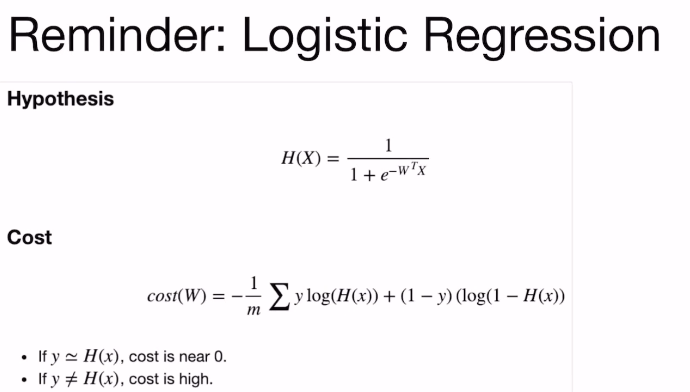
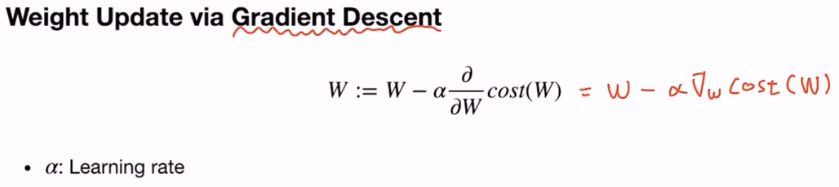

#### Import

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [67]:
# For reproducibility
torch.manual_seed(1)

#### Training Dataset

In [68]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [69]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [70]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


#### Computing the Hypothesis

In [71]:
# torch has torch.exp()
print('e^1 equals:', torch.exp(torch.FloatTensor([1])))

e^1 equals: tensor([2.7183])


In [72]:
W = torch.zeros([2,1],requires_grad = True)
b = torch.zeros(1,requires_grad = True)

In [73]:
hypothesis = 1/ (1+torch.exp(-(x_train.matmul(W)+b)))

In [74]:
print(hypothesis)
print(hypothesis.shape)


tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


#### torch.sigmoid

In [75]:
# torch.sigmoid

print('1/(1+e^{-1}) equals:', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals: tensor([0.7311])


In [76]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [77]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
torch.Size([6, 1])


#### Cost Function

In [78]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [79]:
cost = -torch.mean(y_train*torch.log(hypothesis) + (1-y_train)*(torch.log(1-hypothesis)))
print(cost)

tensor(0.6931, grad_fn=<NegBackward>)


In [80]:
# 위의 값
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

#### Total Code

In [81]:
#모델 초기화 
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 1)
nb_epochs = 1000

for epoch in range(nb_epochs+1):
    
    #Cost 계산 
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    #cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번마다 로그 출력
    if epoch % 100 ==0:
        print('Epoch {:4d} / {} Cost:{:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0 / 1000 Cost:0.693147
Epoch  100 / 1000 Cost:0.134722
Epoch  200 / 1000 Cost:0.080643
Epoch  300 / 1000 Cost:0.057900
Epoch  400 / 1000 Cost:0.045300
Epoch  500 / 1000 Cost:0.037261
Epoch  600 / 1000 Cost:0.031673
Epoch  700 / 1000 Cost:0.027556
Epoch  800 / 1000 Cost:0.024394
Epoch  900 / 1000 Cost:0.021888
Epoch 1000 / 1000 Cost:0.019852


#### Evaluation

In [82]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)


In [83]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


#### Higher Implementation with Class

In [84]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        return self.sigmoid(self.linear(x))

In [85]:
model = BinaryClassifier()

In [86]:
 #모델 초기화 
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 1)
nb_epochs = 1000

for epoch in range(nb_epochs+1):
    
    #Cost 계산 
    hypothesis = model(x_train)
    
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    #cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번마다 로그 출력
    if epoch % 100 ==0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float()== y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d} / {} Cost:{:.6f} Accuracy{:2.2f}%'.format(
        epoch, nb_epochs, cost.item(), accuracy *100,))

Epoch    0 / 1000 Cost:0.539713 Accuracy83.33%
Epoch  100 / 1000 Cost:0.134272 Accuracy100.00%
Epoch  200 / 1000 Cost:0.080486 Accuracy100.00%
Epoch  300 / 1000 Cost:0.057820 Accuracy100.00%
Epoch  400 / 1000 Cost:0.045251 Accuracy100.00%
Epoch  500 / 1000 Cost:0.037228 Accuracy100.00%
Epoch  600 / 1000 Cost:0.031649 Accuracy100.00%
Epoch  700 / 1000 Cost:0.027538 Accuracy100.00%
Epoch  800 / 1000 Cost:0.024381 Accuracy100.00%
Epoch  900 / 1000 Cost:0.021877 Accuracy100.00%
Epoch 1000 / 1000 Cost:0.019843 Accuracy100.00%


# 6 Softmax Classfication

#### Import

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [88]:
# For reproducibility
torch.manual_seed(1)

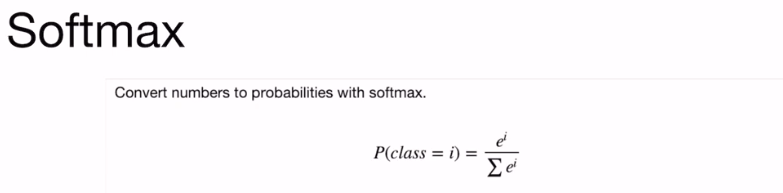

In [89]:
z = torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z,dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [90]:
hypothesis.sum()

tensor(1.)

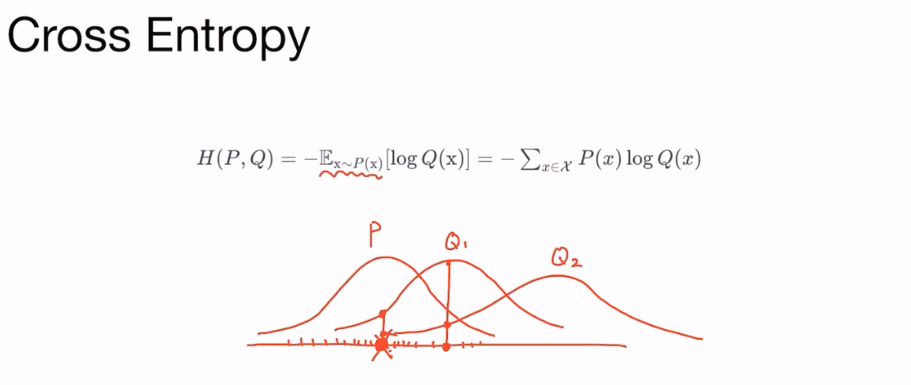

In [91]:
z = torch.rand(3,5,requires_grad = True)
hypothesis = F.softmax(z,dim =1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


In [92]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([0, 2, 1])


In [93]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [94]:
cost = (y_one_hot * - torch.log(hypothesis)).sum(dim =1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


#### Cross Entropy with torch.nn.functional

In [95]:
F.log_softmax(z,dim =1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward>)

In [96]:
F.nll_loss(F.log_softmax(z,dim = 1),y)

tensor(1.4689, grad_fn=<NllLossBackward>)

In [97]:
F.cross_entropy(z,y)

tensor(1.4689, grad_fn=<NllLossBackward>)

### Training with Low-level Cross Entropy Loss

In [98]:
x_train = [[1,2,1,1],
          [2,1,3,2],
          [3,1,3,4],
          [4,1,5,5],
          [1,7,5,5],
          [1,2,5,6],
          [1,6,6,6],
          [1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0]
x_train  = torch.FloatTensor(x_train)
y_train  = torch.LongTensor(y_train)

In [99]:
#모델 초기화
W = torch.zeros((4,3),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

#optimizer 설정
optimizer = optim.SGD([W,b],lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    
    #Cost 계산 (1)
    hypothesis = F.softmax(x_train.matmul(W)+b, dim = 1)
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim = 1))).sum(dim = 1).mean()
    #cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번 마다 로그 출력
    if epoch%100 ==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


In [100]:
#모델 초기화
W = torch.zeros((4,3),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

#optimizer 설정
optimizer = optim.SGD([W,b],lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    
    z = x_train.matmul(W)+b
    cost = F.cross_entropy(z,y_train)
    
    #cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번 마다 로그 출력
    if epoch%100 ==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [101]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
        
    def forward(self, x):
        return self.linear(x)

In [102]:
model = SoftmaxClassifierModel()

In [103]:

#optimizer 설정
optimizer = optim.SGD(model.parameters(),lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction,y_train)
    
    #cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    #100번 마다 로그 출력
    if epoch%100 ==0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609258
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269521
Epoch 1000/1000 Cost: 0.241922
